C:\Users\hiboo\AppData\Local\Temp\ipykernel_55372\2223085269.py:14: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  kalshi_data = pd.read_csv(r"C:\Users\hiboo\tesla_markets_1min_combined.csv")


Epoch 1/100


c:\Users\hiboo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 174508.9062 - val_loss: 174185.6875
Epoch 2/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 174338.3438 - val_loss: 174016.0156
Epoch 3/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 174158.2344 - val_loss: 173826.7500
Epoch 4/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 173964.8125 - val_loss: 173633.5469
Epoch 5/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 173768.1875 - val_loss: 173434.1875
Epoch 6/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 173563.0000 - val_loss: 173224.9219
Epoch 7/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 173347.2344 - val_loss: 173004.1094
Epoch 8/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 173117.2500 - val_loss: 172765.4844
Epoch 9/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 172861.1875 - val_loss: 172486.6719
Epoch 10/100
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 172559.2969 - val_loss: 172172.1406
Epoch 11/100
595/595 ━━━━━━

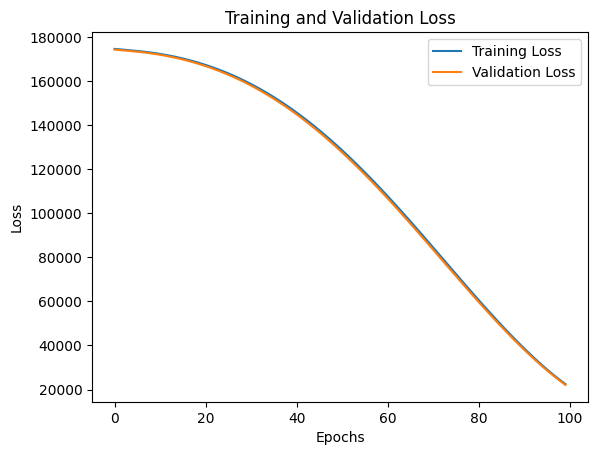

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

tesla_stock_data = pd.read_csv(r"C:\Users\hiboo\normalized_tesla_stock_1min.csv")
kalshi_data = pd.read_csv(r"C:\Users\hiboo\tesla_markets_1min_combined.csv")

tesla_stock_data['timestamp'] = pd.to_datetime(tesla_stock_data['timestamp'], errors='coerce')
kalshi_data['timestamp'] = pd.to_datetime(kalshi_data['timestamp'], errors='coerce')

merged_data = pd.merge(tesla_stock_data, kalshi_data, on='timestamp', how='left')

merged_data_cleaned = merged_data.dropna(subset=['tsla_close', 'tsla_volume', 'spy_close', 'spy_volume'])

kalshi_features = merged_data_cleaned[['tsla_close', 'tsla_volume', 'spy_close', 'spy_volume']]

scaler = StandardScaler()
scaled_kalshi_features = scaler.fit_transform(kalshi_features)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_kalshi_features)

merged_data_cleaned['target'] = merged_data_cleaned['tsla_close'].shift(-5)

merged_data_cleaned = merged_data_cleaned.dropna(subset=['target'])

X = reduced_features[:len(merged_data_cleaned)] 
y = merged_data_cleaned['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) 
])

model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


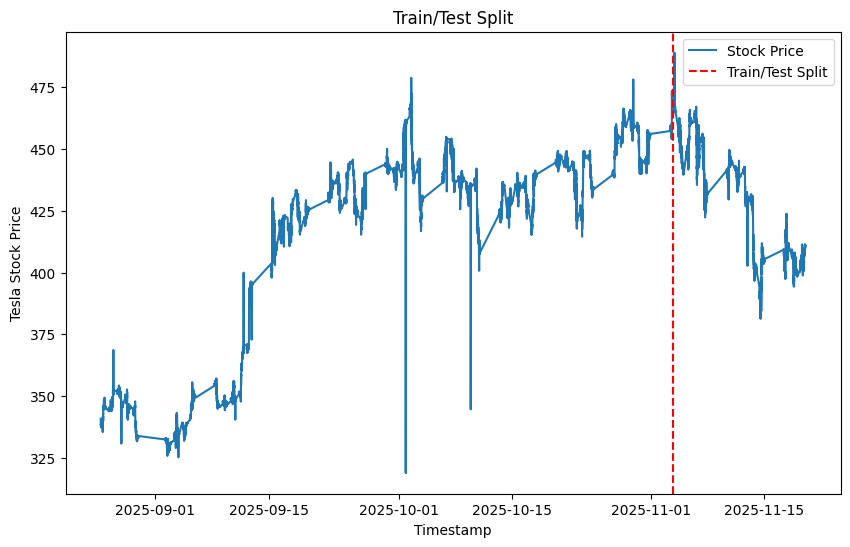

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(merged_data_cleaned['timestamp'], merged_data_cleaned['tsla_close'], label='Stock Price')

plt.axvline(x=train_data['timestamp'].iloc[-1], color='r', linestyle='--', label="Train/Test Split")

# Labels and title
plt.xlabel('Timestamp')
plt.ylabel('Tesla Stock Price')
plt.title('Train/Test Split')
plt.legend()
plt.show()


Training and evaluating for 1440 minute prediction...
Epoch 1/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 243.9211 - val_loss: 239.7205
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 235.9255 - val_loss: 236.3470
Epoch 3/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 232.8571 - val_loss: 233.5367
Epoch 4/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 230.2117 - val_loss: 231.0328
Epoch 5/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - loss: 227.8437 - val_loss: 228.7502
Epoch 6/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 225.6908 - val_loss: 226.6659
Epoch 7/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 223.7117 - val_loss: 224.7336
Epoch 8/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 221.8823 - val_loss: 222.9478
Epoch 9/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 220.1947 - val_loss: 221.3012
Epoch 10/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 218.6398 - val_loss: 219.7648
363/363 ━━━━━━━━━━━━━━━

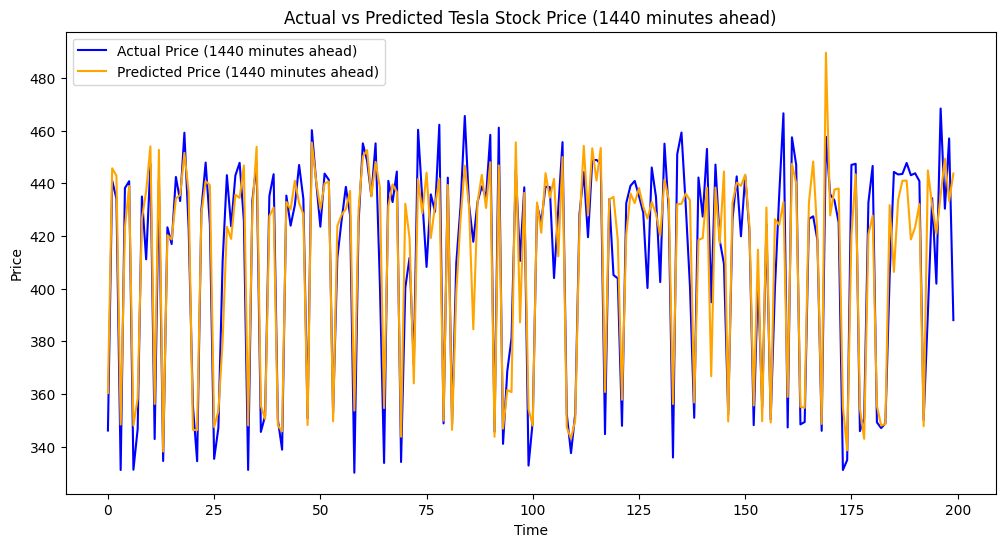

Training and evaluating for 5 minute prediction...
Epoch 1/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 81.2099 - val_loss: 81.9329
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 76.0466 - val_loss: 81.3016
Epoch 3/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75.8367 - val_loss: 81.0707
Epoch 4/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75.6922 - val_loss: 80.8571
Epoch 5/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75.5476 - val_loss: 80.6491
Epoch 6/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 75.4038 - val_loss: 80.4458
Epoch 7/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75.2619 - val_loss: 80.2459
Epoch 8/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 75.1225 - val_loss: 80.0498
Epoch 9/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.9872 - val_loss: 79.8605
Epoch 10/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 74.8554 - val_loss: 79.6767
Epoch 11/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 894

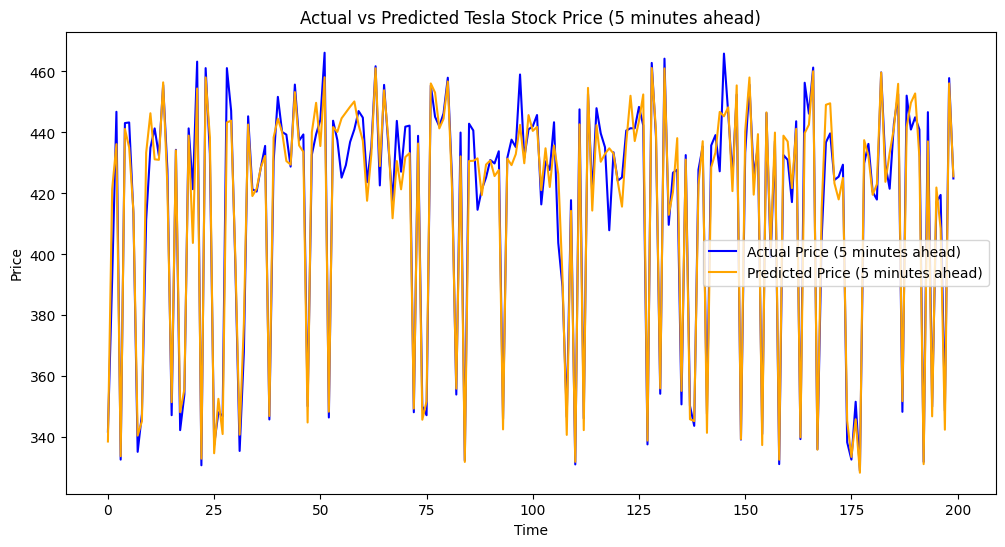

Training and evaluating for 10 minute prediction...
Epoch 1/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 71.1441 - val_loss: 74.3193
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.1182 - val_loss: 74.2808
Epoch 3/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.0921 - val_loss: 74.2438
Epoch 4/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.0664 - val_loss: 74.2088
Epoch 5/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 71.0414 - val_loss: 74.1754
Epoch 6/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 71.0172 - val_loss: 74.1418
Epoch 7/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.9934 - val_loss: 74.1094
Epoch 8/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.9705 - val_loss: 74.0778
Epoch 9/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 70.9481 - val_loss: 74.0468
Epoch 10/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.9258 - val_loss: 74.0162
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
Mean A

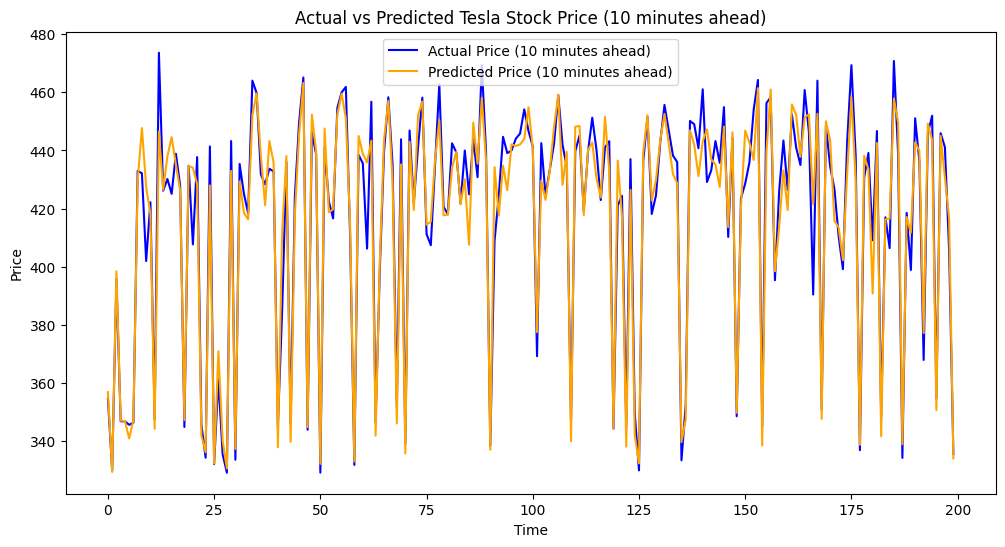

Training and evaluating for 15 minute prediction...
Epoch 1/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.3032 - val_loss: 74.6797
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.2696 - val_loss: 74.6508
Epoch 3/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.2440 - val_loss: 74.6148
Epoch 4/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 71.2202 - val_loss: 74.5763
Epoch 5/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 71.1973 - val_loss: 74.5383
Epoch 6/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 71.1752 - val_loss: 74.4996
Epoch 7/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 71.1537 - val_loss: 74.4637
Epoch 8/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.1332 - val_loss: 74.4272
Epoch 9/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 71.1131 - val_loss: 74.3928
Epoch 10/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 71.0929 - val_loss: 74.3601
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
Me

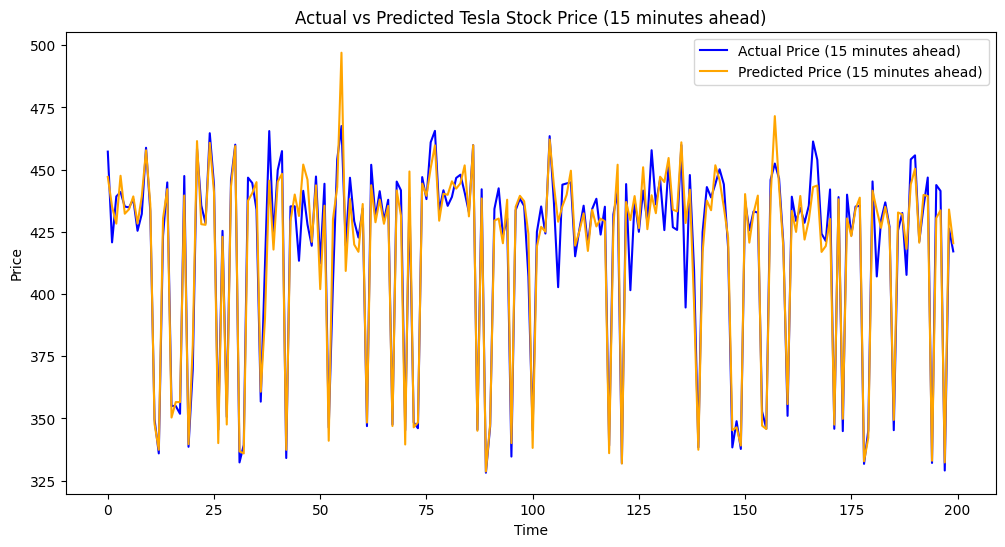

Training and evaluating for 30 minute prediction...
Epoch 1/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 73.5068 - val_loss: 76.0164
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 73.4832 - val_loss: 75.9796
Epoch 3/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 73.4565 - val_loss: 75.9455
Epoch 4/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 73.4312 - val_loss: 75.9139
Epoch 5/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.4072 - val_loss: 75.8829
Epoch 6/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.3841 - val_loss: 75.8522
Epoch 7/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.3622 - val_loss: 75.8229
Epoch 8/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.3404 - val_loss: 75.7940
Epoch 9/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.3191 - val_loss: 75.7649
Epoch 10/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.2983 - val_loss: 75.7376
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Mean A

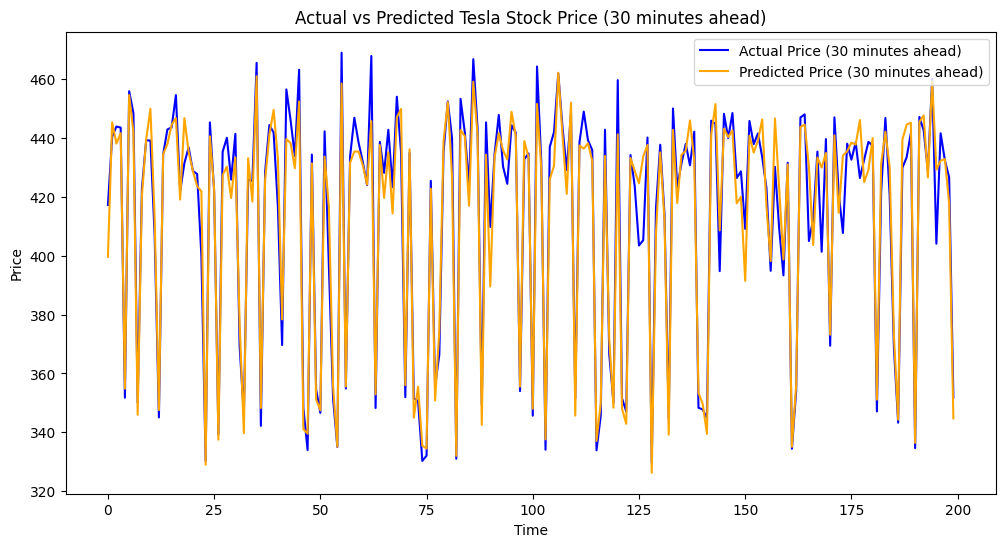

Training and evaluating for 60 minute prediction...
Epoch 1/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.9840 - val_loss: 82.1629
Epoch 2/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.9417 - val_loss: 82.1160
Epoch 3/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.9074 - val_loss: 82.0765
Epoch 4/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.8774 - val_loss: 82.0415
Epoch 5/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 77.8500 - val_loss: 82.0084
Epoch 6/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 77.8244 - val_loss: 81.9778
Epoch 7/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 77.8003 - val_loss: 81.9496
Epoch 8/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.7777 - val_loss: 81.9220
Epoch 9/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 77.7556 - val_loss: 81.8956
Epoch 10/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 77.7349 - val_loss: 81.8694
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
Mea

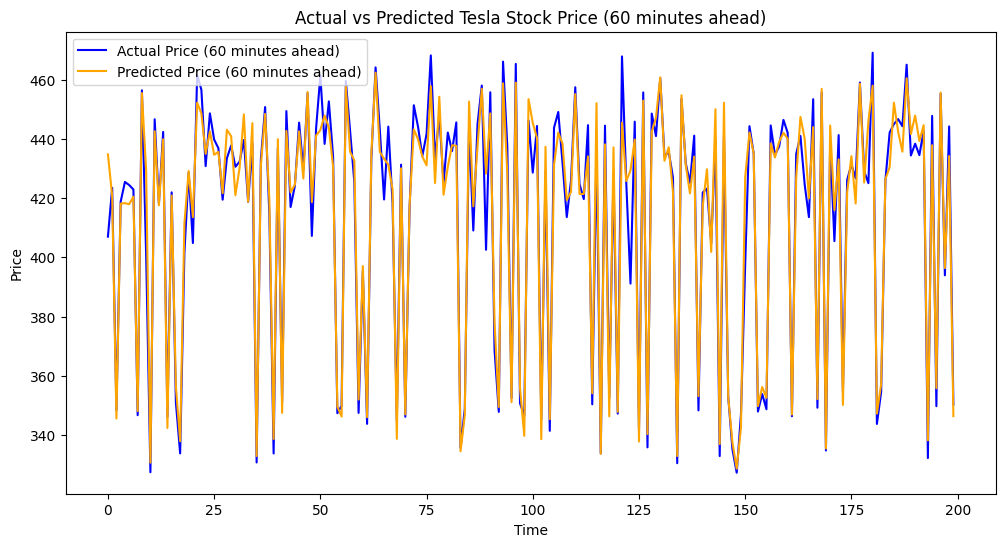

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

time_horizons = [1440, 5, 10, 15, 30, 60]  

for horizon in time_horizons:
    print(f"Training and evaluating for {horizon} minute prediction...")

    merged_data_cleaned[f'target_{horizon}min'] = merged_data_cleaned['tsla_close'].shift(-horizon)

    merged_data_cleaned = merged_data_cleaned.dropna(subset=[f'target_{horizon}min'])

    X_horizon = reduced_features[:len(merged_data_cleaned)] 
    y_horizon = merged_data_cleaned[f'target_{horizon}min'].values 

    X_train, X_test, y_train, y_test = train_test_split(X_horizon, y_horizon, test_size=0.2, random_state=42)

    model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    y_pred_horizon = model.predict(X_test)

    mae_horizon = mean_absolute_error(y_test, y_pred_horizon)
    rmse_horizon = np.sqrt(mean_squared_error(y_test, y_pred_horizon))

    print(f'Mean Absolute Error ({horizon} mins): {mae_horizon}')
    print(f'Root Mean Squared Error ({horizon} mins): {rmse_horizon}')

    plt.figure(figsize=(12,6))
    plt.plot(y_test[:200], label=f'Actual Price ({horizon} minutes ahead)', color='blue')  
    plt.plot(y_pred_horizon[:200], label=f'Predicted Price ({horizon} minutes ahead)', color='orange')  
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Tesla Stock Price ({horizon} minutes ahead)')
    plt.legend()
    plt.show()
